In [52]:
import mesa as ms
import nugridse as mp
import read_yields as ry
#import matplotlib.pyplot as plt
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


### Read data

In [ ]:
nugrid_data_dir='/home/nugrid/CADC/NuGrid'
path_see=nugrid_data_dir+'/set1/set1.2_m/see_wind/M15.0Z2.0e-02/LOGS'
path_ppd=nugrid_data_dir+'/set1/set1.2_m/ppd_wind/M15.0Z2.0e-02/H5_out'
historydata=ms.star_log(path_see)
sefiles=mp.se(path_ppd)

In [70]:
#path_see='/rpod3/critter/Results/DATA/Set1_extension/set1.2_mesa/see_wind/M15.0Z2.0e-02/LOGS'
#path_ppd='/rpod3/critter/Results/DATA/Set1_extension/set1.2_mesa/ppd_wind/M15.0Z2.0e-02/H5_out'
#historydata=ms.history_data(path_see)
#sefiles=mp.se(path_ppd)

## Stellar evolution

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map


<IPython.core.display.Javascript object>


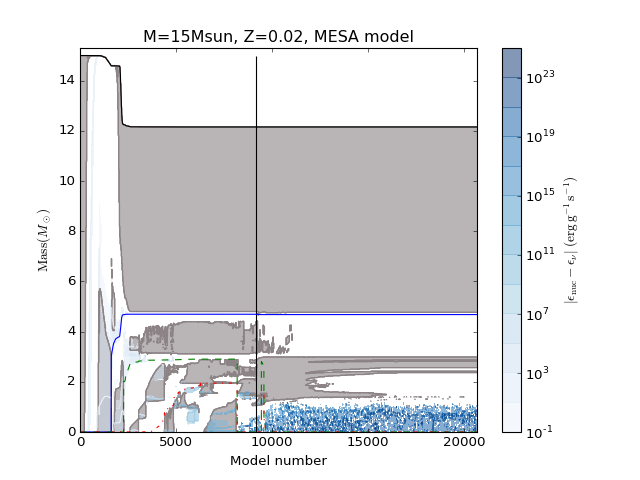

plot versus model number
plotting contours
plotting patches
plotting abund boundaries


In [50]:
historydata.kip_cont(ifig=0,ixaxis='model_number')
plt.title('M=15Msun, Z=0.02, MESA model')
plt.vlines(9180,0,15)

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map


<IPython.core.display.Javascript object>


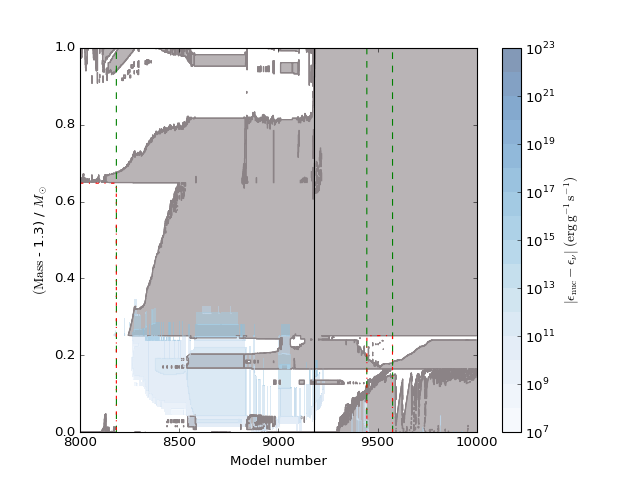

plot versus model number
plotting contours
plotting patches
plotting abund boundaries


In [49]:
historydata.kip_cont(ifig=1,ixaxis='model_number',modstart=8000,modstop=10000,xres=10000,yres=10000,ylims=[1.3,2.3])
plt.vlines(9180,0,3)

### Plot abundance profile at cycle 9180

In [26]:
cycle=9180
m=sefiles.get(cycle,'mass')
c12=sefiles.get(cycle,'C-12')
o16=sefiles.get(cycle,'O-16')
ne20=sefiles.get(cycle,'Ne-20')
si28=sefiles.get(cycle,'Si-28')
dcoeff=sefiles.get(cycle,'dcoeff')
#special isotopes
cl35=sefiles.get(cycle,'Cl-35')
k39=sefiles.get(cycle,'K-39')
sc45=sefiles.get(cycle,'Sc-45')

 reading ['iso_massf']...100%

<IPython.core.display.Javascript object>


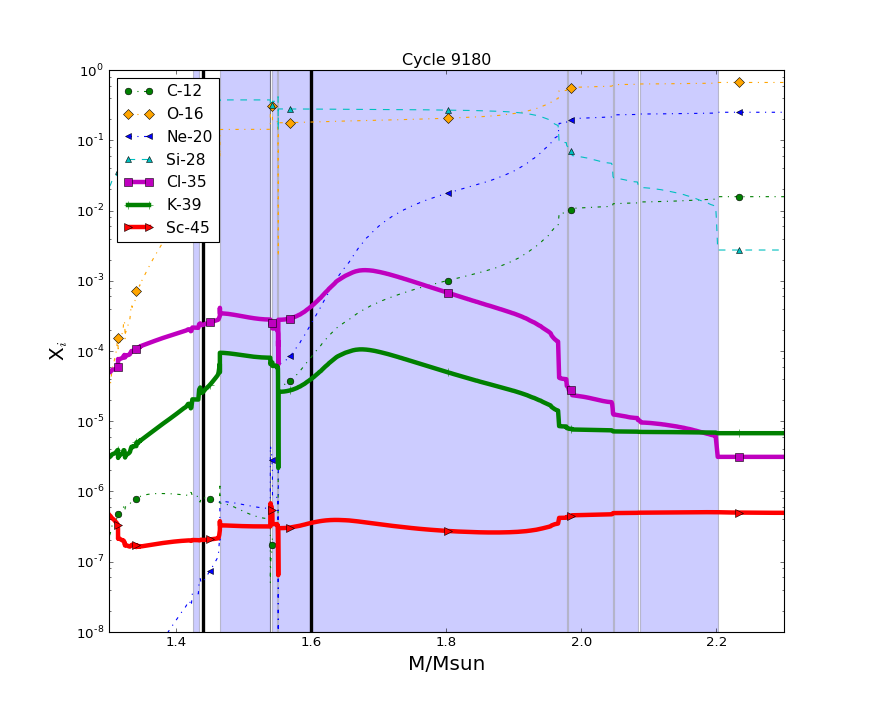

In [44]:
plt.figure(2)

#derive convective regions
mmin=0
mmax=0
found_zone=False
D_conv=1e8
for k in range(len(dcoeff)):
    if (found_zone==False) and (dcoeff[k]>D_conv):
        mmin=m[k]
        found_zone=True
    if found_zone==True and (dcoeff[k]<D_conv):
        mmax=m[k]
        p = plt.axvspan(mmin,mmax, facecolor='b', alpha=0.2)
        found_zone=False

#isotope plots
color=['g','orange','b','c','m','g','r']
markevery=200
plt.plot(m,c12,label='C-12',marker='o',linestyle='-.',markevery=markevery,color=color[0])
plt.plot(m,o16,label='O-16',marker='D',linestyle='-.',markevery=markevery,color=color[1])
plt.plot(m,ne20,label='Ne-20',marker='<',linestyle='-.',markevery=markevery,color=color[2])
plt.plot(m,si28,label='Si-28',marker='^',linestyle='--',markevery=markevery,color=color[3])
plt.plot(m,cl35,label='Cl-35',marker='s',linestyle='-',markevery=markevery,linewidth=4,markersize=8,color=color[4])
plt.plot(m,k39,label='K-39',marker='+',linestyle='-',markevery=markevery,linewidth=4,markersize=8,color=color[5])
plt.plot(m,sc45,label='Sc-45',marker='>',linestyle='-',markevery=markevery,linewidth=4,markersize=8,color=color[6])

#mass cuts
plt.vlines(1.6,1e-8,1,linewidth=3,color='k')
plt.vlines(1.44,1e-8,1,linewidth=3,color='k')

#general plot settings
plt.xlabel('mass/Msun')
plt.ylabel('X$_i$')
plt.xlabel('M/Msun',fontsize=18)
plt.ylabel('X$_i$',fontsize=18)
plt.ylim(1e-8,1)
plt.xlim(1.3,2.3)
plt.legend(loc=2,fontsize=14)
plt.yscale('log')
plt.title('Cycle '+str(cycle))

## Which material is produced in the merger?

In [67]:
y=ry.read_nugrid_yields('element_yield_table_MESAonly_9200.txt')
yhigh=ry.read_nugrid_yields('element_yield_table_MESAonly_9300.txt')
eles=y.get(M=15,Z=0.02,quantity='Isotopes')
Zs=y.get(M=15,Z=0.02,quantity='Z')

<IPython.core.display.Javascript object>


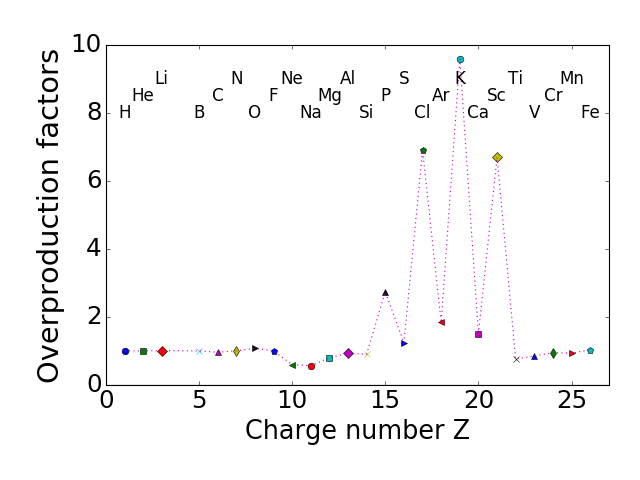

In [68]:
marker=200*['o','s','D','x','^','d','>','p','<']
plt.figure()

quots=[]
Z_quots=[]
for k in range(len(eles)):
        if Zs[k]>26:
                continue
        quot=yhigh.get(M=15,Z=0.02,specie=eles[k])/y.get(M=15,Z=0.02,specie=eles[k])
        quots.append(quot)
        #plt.plot(Zs[k],quot,marker=marker[k])
        plt.plot(Zs[k],np.array(quot),marker=marker[k])
        Z_quots.append(Zs[k])
plt.plot(Z_quots,quots,linestyle=':',marker=None)
plt.hlines(np.log10(1),0.,100,linestyle='-')

#plot the element label
ax=plt.gca()
import matplotlib.transforms as transforms
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
fontsizelabel='xx-small' #'x-small'
hh=0
for z in range(len(eles)):
        if Zs[z]>26:
                continue
        pos=0.8
        if hh==0:
                nmin=pos
        if hh==1:
                nmin=pos+0.05
        if hh==2:
                nmin=pos+0.10
        ax.text(Zs[z],nmin,eles[z],horizontalalignment='center',verticalalignment='center',fontsize=fontsizelabel,clip_on=True,transform=trans) #x-msall
        if hh==0:
                hh=1
                continue
        if hh==1:
                hh=2
                continue
        if hh==2:
                hh=0
                continue

plt.xlabel('Charge number Z',size=23)
plt.legend(loc=1,prop={'size':17})
plt.rcParams.update({'font.size':26})
plt.show()
plt.locator_params(axis='y',nbins=6)
plt.ylabel('Overproduction factors')
plt.xlim(0,27)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=22)
plt.tick_params(axis='both', which='minor', labelsize=22)


